# DSAI Mini Project 

### Importing essential Python libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
import statsmodels.api as sm
%matplotlib inline

import os

### Importing the Aviation Crash Dataset

#### This dataset has been edited and cleaned up before usage

In [2]:
data = pd.read_csv('AviationData(Final).csv', encoding = 'ISO-8859-1')
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Fatality
0,20170308X94158,Accident,ERA17LA125,8/3/2017,"Abbeville, AL",United States,31.594166,-85.237777,0J0,Abbeville Municipal Airport,...,Instructional,NaN,0,2,0,0,VMC,APPROACH,Preliminary,0
1,20001212X21242,Accident,FTW00LA223,29/6/2000,"Abbeville, LA",United States,29.851333,-92.162555,0R3,Abbeville Chris Crusta,...,Personal,NaN,0,0,0,1,VMC,LANDING,Probable Cause,0
2,20080509X00643,Accident,DFW08LA089B,28/3/2008,"Abbeville, LA",United States,29.945555,-92.146944,NaN,Abbeville Chris Crusta,...,Aerial Application,NaN,0,0,0,2,VMC,APPROACH,Probable Cause,0
3,20080509X00643,Accident,DFW08LA089A,28/3/2008,"Abbeville, LA",United States,29.945555,-92.146944,NaN,Abbeville Chris Crusta,...,Personal,NaN,0,0,0,2,VMC,APPROACH,Probable Cause,0
4,20081007X93846,Accident,DFW08CA207,14/8/2008,"Abbeville, LA",United States,29.975556,-92.083889,NaN,Abbeville Chris Crusta,...,Instructional,NaN,0,0,1,2,VMC,TAKEOFF,Probable Cause,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24909,20010621X01229,Accident,SEA01LA119,16/6/2001,"Zillah, WA",United States,46.456111,-120.264444,68WA,MC MAHON FIELD,...,Personal,NaN,0,0,2,0,VMC,LANDING,Probable Cause,0
24910,20091130X93208,Accident,WPR10LA069,29/11/2009,"Zillah, WA",United States,46.456111,-120.264444,NaN,NaN,...,Personal,NaN,0,1,0,0,VMC,MANEUVERING,Probable Cause,0
24911,20160422X22121,Accident,CEN16LA163,21/4/2016,"Zionsville, IN",United States,40.030556,-86.251389,TYQ,Indianapolis Executive Airport,...,Instructional,NaN,0,0,2,0,VMC,GO-AROUND,Probable Cause,0
24912,20030718X01152,Accident,SEA03LA140,15/7/2003,"Zurich, MT",United States,48.630556,-109.031389,NaN,NaN,...,Aerial Observation,NaN,0,2,0,0,VMC,MANEUVERING,Probable Cause,0


## Data Preperation

#### The variable "Make" contains many variables which refer to the same make of a plane, but are named differently. Additional cleanup and edits are made to correct this.

In [3]:
adata = data.copy()
import re

In [4]:
adata['Make'] = adata['Make'].str.upper()
adata['Make'] = adata['Make'].str.replace(".","")
adata['Make'] = adata['Make'].str.replace(" ","_")

In [5]:
adata['Make'] = adata['Make'].str.replace("_INC","")
adata['Make'] = adata['Make'].str.replace("_CORP","")
adata['Make'] = adata['Make'].str.replace("_COMPANY","")

In [6]:
adata["Make"].describe() #reduced about 500 duplicate names

count      24911
unique      3783
top       CESSNA
freq        7245
Name: Make, dtype: object

In [7]:
adata['Make'].value_counts(normalize=True).head(15) #only top 9 make up at least 1% each

CESSNA                 0.290835
PIPER                  0.164666
BEECH                  0.058488
BELL                   0.023042
MOONEY                 0.016740
AIR_TRACTION           0.015656
ROBINSON               0.015254
ROBINSON_HELICOPTER    0.010879
BELLANCA               0.010758
MAULE                  0.008952
HUGHES                 0.008550
AERONCA                0.008189
CIRRUS_DESIGN          0.007748
GRUMMAN                0.006744
LUSCOMBE               0.006463
Name: Make, dtype: float64

#### As only the top 9 categories make up at least 1% of the entire dataset, all other categories will be combined into "Others"

In [8]:
count = 0
make_list_clean = adata["Make"].value_counts(normalize=True).head(9) #only include 'Makes' that is at least 1% of total
for i in make_list_clean:
    count += i
count = 1 - count # total percentage of 'Makes' that make up less than 1% of total
data = [[count]]
df = pd.DataFrame(data,index=['OTHERS'])
make_list_clean.append(df)

,0
CESSNA,0.290835
PIPER,0.164666
BEECH,0.058488
BELL,0.023042
MOONEY,0.016740
AIR_TRACTION,0.015656
ROBINSON,0.015254
ROBINSON_HELICOPTER,0.010879
BELLANCA,0.010758
OTHERS,0.393682


In [9]:
make_list_clean = make_list_clean.index.tolist()
make_list_clean

['CESSNA',
 'PIPER',
 'BEECH',
 'BELL',
 'MOONEY',
 'AIR_TRACTION',
 'ROBINSON',
 'ROBINSON_HELICOPTER',
 'BELLANCA']

In [10]:
for i in range(0,24914): #size of df is 24914
    if adata['Make'][i] not in make_list_clean:
        adata['Make'][i] = "OTHERS"

C:\Users\jinha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
print(adata['Make'].describe()) #now only 10 variables

count      24914
unique        10
top       OTHERS
freq        9810
Name: Make, dtype: object


## Statistical Description & Exploratory Analysis

In [12]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24914 entries, 0 to 24913
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                24914 non-null  object 
 1   Investigation.Type      24914 non-null  object 
 2   Accident.Number         24914 non-null  object 
 3   Event.Date              24914 non-null  object 
 4   Location                24914 non-null  object 
 5   Country                 24914 non-null  object 
 6   Latitude                24914 non-null  float64
 7   Longitude               24914 non-null  float64
 8   Airport.Code            17701 non-null  object 
 9   Airport.Name            18200 non-null  object 
 10  Injury.Severity         24914 non-null  object 
 11  Aircraft.Damage         24751 non-null  object 
 12  Aircraft.Category       15800 non-null  object 
 13  Registration.Number     24906 non-null  object 
 14  Make                    24914 non-null

#### Out of all the variables, we have decided that "Latitude/Longitude", "Airport Name", "Make", "Number of Engines", "Engine Type", "Purpose of Flight", "Weather Condition" and "Broad Phase of Flight" may be able to influence whether a plane crash is fatal or not.

#### Other than "Latitude/Longitude", all other variables chosen above are categorical. They are nominal in nature, i.e. they have no concept of ordering amongst the values they attribute

### Extraction of Variables

In [13]:
name = pd.DataFrame(adata['Airport.Name'])
make = pd.DataFrame(adata['Make'])
NOE = pd.DataFrame(adata['Number.of.Engines'])
enginetype = pd.DataFrame(adata['Engine.Type'])
purpose = pd.DataFrame(adata['Purpose.of.Flight'])
weather = pd.DataFrame(adata['Weather.Condition'])
phase = pd.DataFrame(adata['Broad.Phase.of.Flight'])
fatal = pd.DataFrame(adata['Fatality'])

### Fatality

In [14]:
fatal.describe()

,Fatality
count,24914.000000
mean,0.177009
std,0.381684
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


0    20504
1     4410
Name: Fatality, dtype: int64


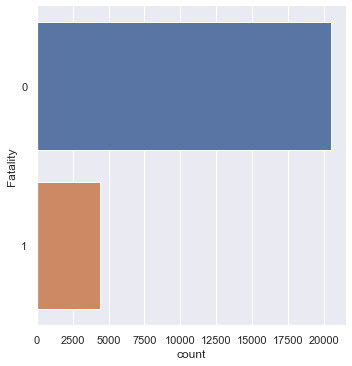

In [15]:
print(adata["Fatality"].value_counts())
sb.catplot(y = "Fatality", data = adata, kind = 'count')

#### Total.Fatal.Injuries is a categorical variable, with "0" standing for no fatality and "1" standing for presence of fatality in the plane crash.

#### As shown in the graph above, there are much more instances of "0" than "1". This may result in class imbalance.

### Airport Name

In [16]:
name.describe()

,Airport.Name
count,18200
unique,10209
top,Private
freq,183


#### Most crashes happen from take-off from private airports, i.e. crashes are not commercial in nature.

#### We have decided not to use the name of the airport because there are too many unique airport (23862) to even provide any useful data for prediction

### Make

In [17]:
make.describe()

,Make
count,24914
unique,10
top,OTHERS
freq,9810


OTHERS                 9810
CESSNA                 7245
PIPER                  4102
BEECH                  1457
BELL                    574
MOONEY                  417
AIR_TRACTION            390
ROBINSON                380
ROBINSON_HELICOPTER     271
BELLANCA                268
Name: Make, dtype: int64


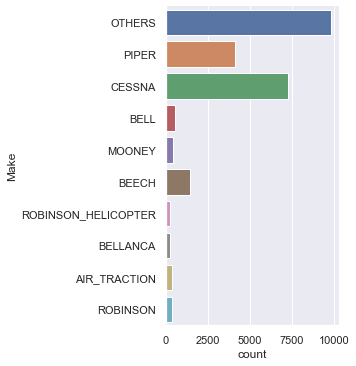

In [18]:
print(adata["Make"].value_counts())
sb.catplot(y = "Make", data = adata, kind = 'count')

### Number of Engines

In [19]:
NOE.describe()

,Number.of.Engines
count,24914.000000
mean,1.091876
std,0.298425
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


1    22658
2     2218
4       16
3       15
0        7
Name: Number.of.Engines, dtype: int64


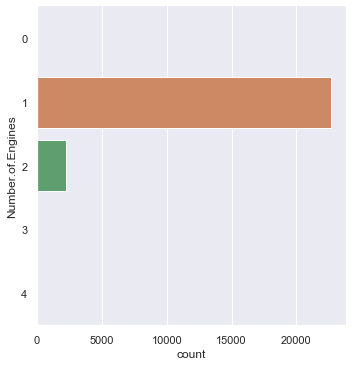

In [20]:
print(adata["Number.of.Engines"].value_counts())
sb.catplot(y = "Number.of.Engines", data = adata, kind = 'count')

### Engine Type

In [21]:
enginetype.describe()

,Engine.Type
count,24914
unique,10
top,Reciprocating
freq,22363


Reciprocating       22363
Turbo Prop           1120
Turbo Shaft          1044
Turbo Fan             244
Turbo Jet             124
None                   12
Electric                3
REC, TJ, TJ             2
REC, ELEC               1
TJ, REC, REC, TJ        1
Name: Engine.Type, dtype: int64


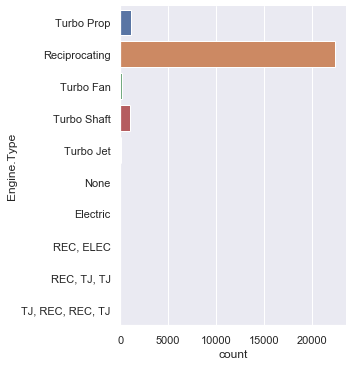

In [22]:
print(adata["Engine.Type"].value_counts())
sb.catplot(y = "Engine.Type", data = adata, kind = 'count')

### Purpose of Flight

In [23]:
purpose.describe()

,Purpose.of.Flight
count,24914
unique,21
top,Personal
freq,16493


count        24914
unique          21
top       Personal
freq         16493
Name: Purpose.of.Flight, dtype: object


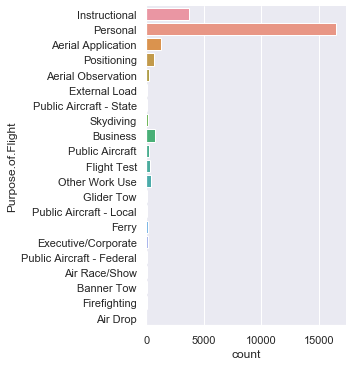

In [24]:
print(adata["Purpose.of.Flight"].describe())
sb.catplot(y = "Purpose.of.Flight", data = adata, kind = 'count')

### Weather Condition

In [25]:
weather.describe()

,Weather.Condition
count,24914
unique,3
top,VMC
freq,23672


VMC    23672
IMC     1218
UNK       24
Name: Weather.Condition, dtype: int64


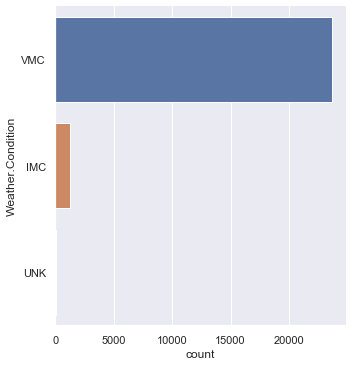

In [26]:
print(adata["Weather.Condition"].value_counts())
sb.catplot(y = "Weather.Condition", data = adata, kind = 'count')

### Broad Phase of Flight

In [27]:
phase.describe()

,Broad.Phase.of.Flight
count,24914
unique,11
top,LANDING
freq,8099


LANDING        8099
TAKEOFF        5505
MANEUVERING    3467
APPROACH       2534
CRUISE         2366
TAXI            701
DESCENT         630
GO-AROUND       596
CLIMB           576
STANDING        401
OTHER            39
Name: Broad.Phase.of.Flight, dtype: int64


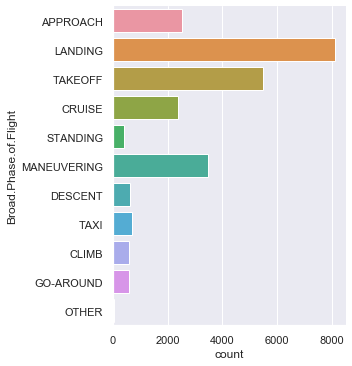

In [28]:
print(adata["Broad.Phase.of.Flight"].value_counts())
sb.catplot(y = "Broad.Phase.of.Flight", data = adata, kind = 'count')

#### In order to more accurately predict whether a plane crash will be fatal or not, we have decided to first pick the three variables which can predict Fatality the best to be our predictors.

### Latitude and Longitude 

In [37]:
# Importing essential libraries for Geoplot
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from descartes import PolygonPatch

OSError: [WinError 126] The specified module could not be found

In [ ]:
Longitude = pd.DataFrame(adata['Longitude'])
Latitude = pd.DataFrame(adata['Latitude'])

In [ ]:
geometry = [Point(xy) for xy in zip(adata['Longitude'], adata['Latitude'])]
gdf = GeoDataFrame(adata, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

## Pattern Recognition and Analytic Visualization

In [29]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

#### As "Make", "Engine Type", "Purpose of Flight", "Weather Condition" and "Broad Phase of Flight" are categorical variables with strings as values, we must dummy code them before classification.

In [30]:
make_dummy = pd.get_dummies(data=make)
enginetype_dummy = pd.get_dummies(data=enginetype)
purpose_dummy = pd.get_dummies(data=purpose)
weather_dummy = pd.get_dummies(data=weather)
phase_dummy = pd.get_dummies(data=phase)

### Classification between Make and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8224374090612614

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8252056993778848



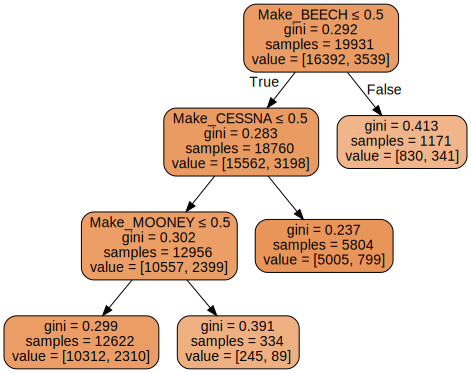

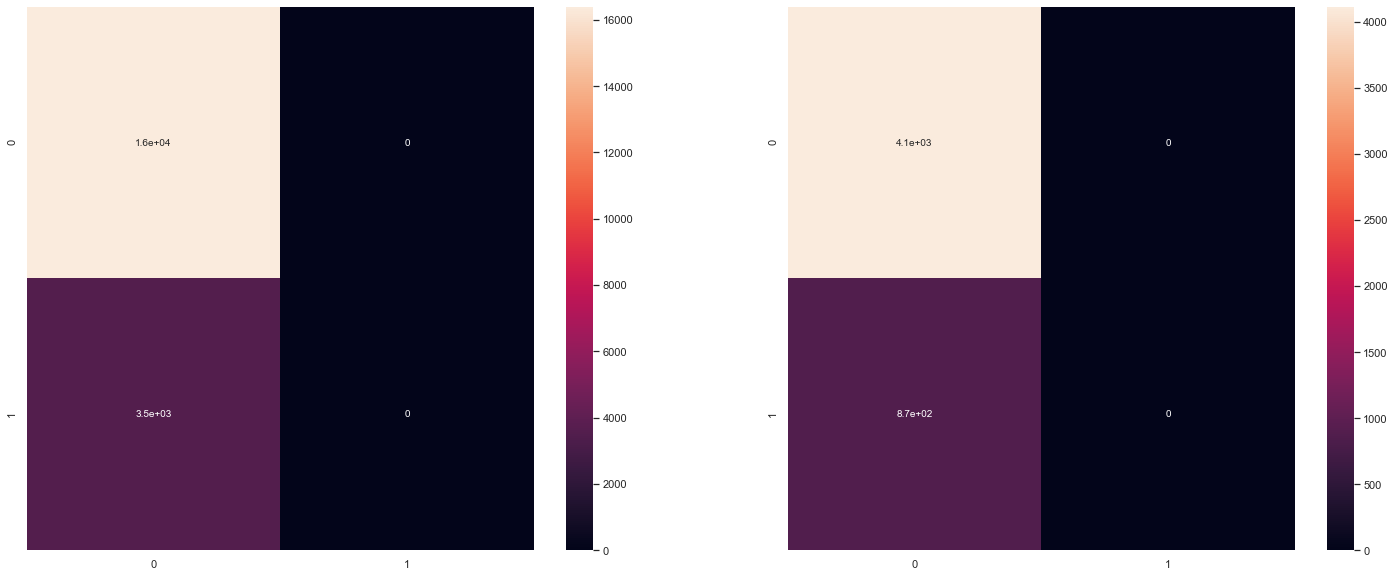

In [31]:
# Split the Legendary-Total Dataset into Train and Test
make_train, make_test, fatal_train, fatal_test = train_test_split(make_dummy, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(make_train, fatal_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
fatal_train_pred = dectree.predict(make_train)
fatal_test_pred = dectree.predict(make_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(make_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(make_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = make_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Classification between Number of Engines and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8217851587978526

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8278145695364238



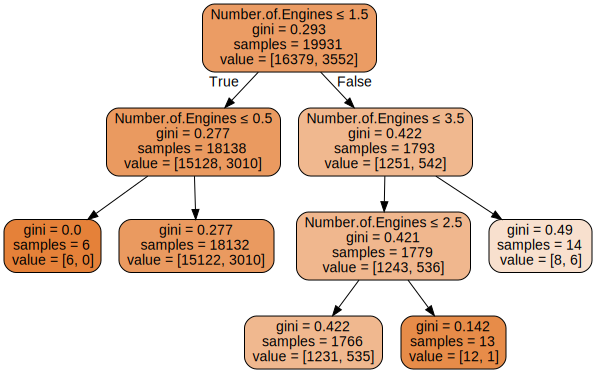

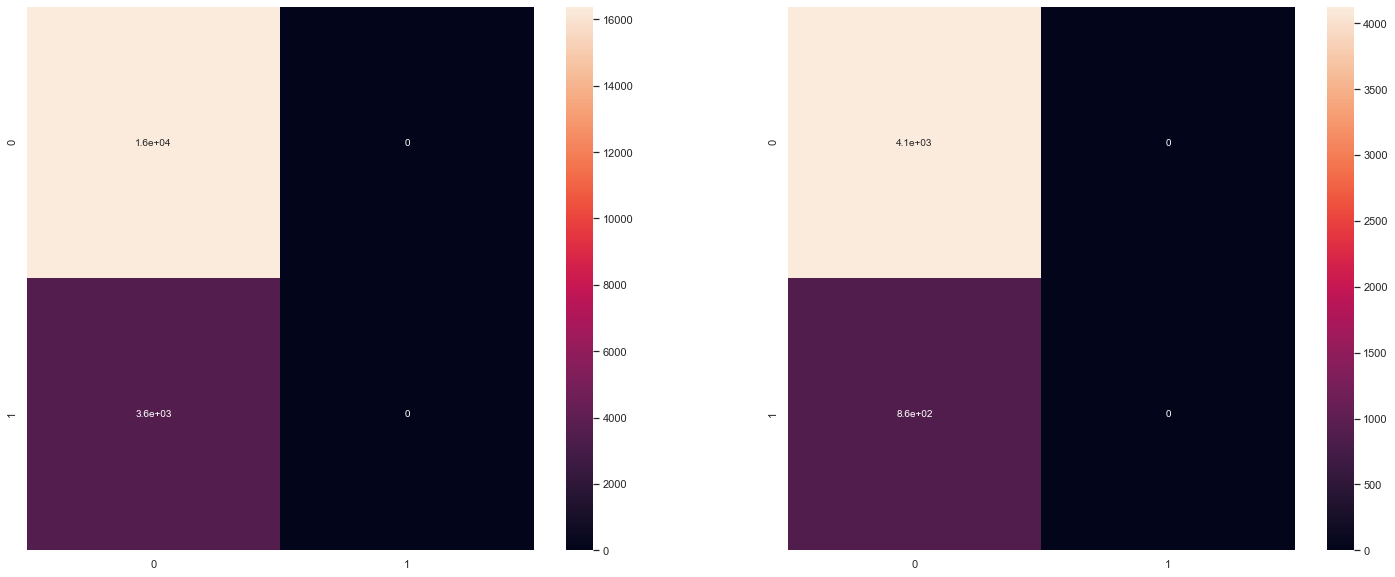

In [32]:
# Split the Legendary-Total Dataset into Train and Test
NOE_train, NOE_test, fatal_train, fatal_test = train_test_split(NOE, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(NOE_train, fatal_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
fatal_train_pred = dectree.predict(NOE_train)
fatal_test_pred = dectree.predict(NOE_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(NOE_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(NOE_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = NOE_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Classification between Engine Type and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8238924288796348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8193859121011439



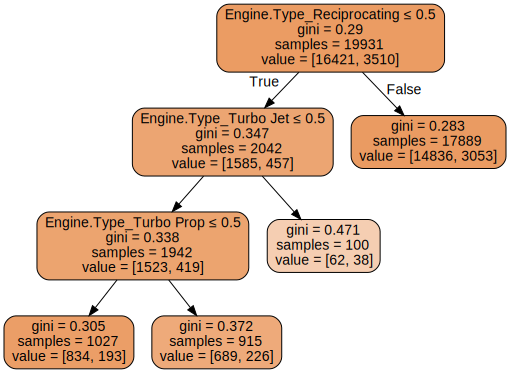

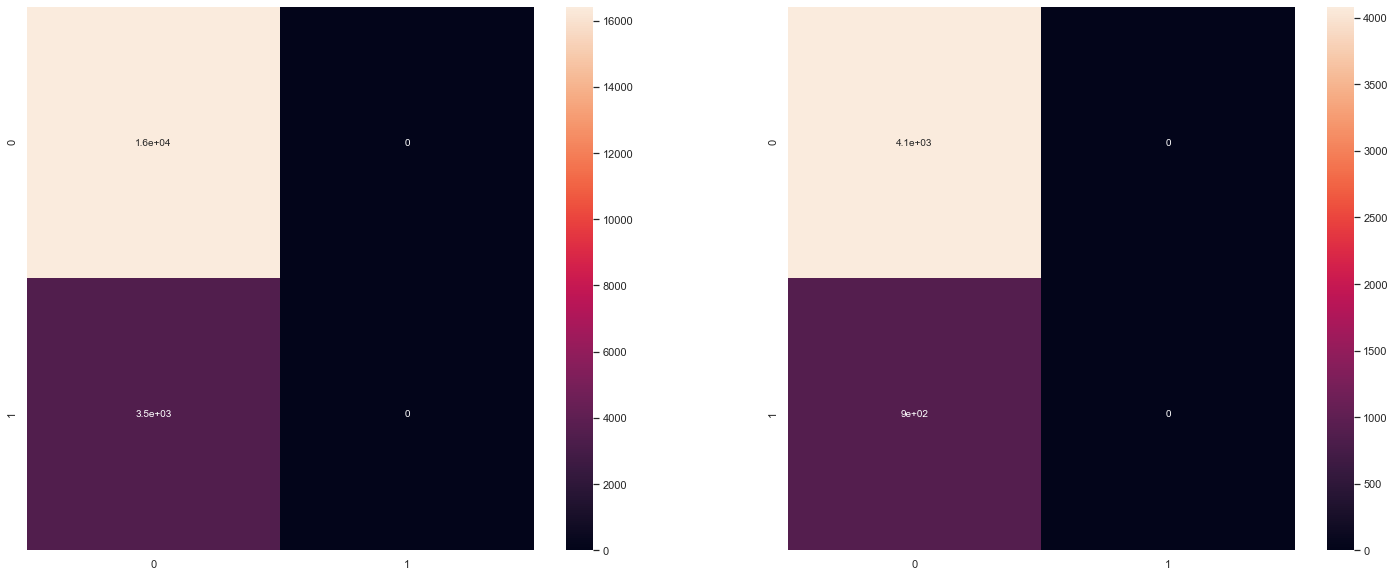

In [33]:
# Split the Dataset into Train and Test
engine_train, engine_test, fatal_train, fatal_test = train_test_split(enginetype_dummy, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(engine_train, fatal_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
fatal_train_pred = dectree.predict(engine_train)
fatal_test_pred = dectree.predict(engine_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(engine_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(engine_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = engine_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Classification between Purpose of Flight and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8221363704781496

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8264097932972105



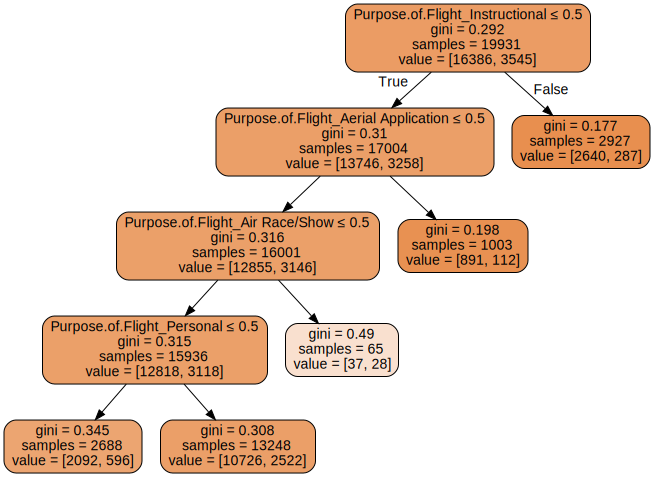

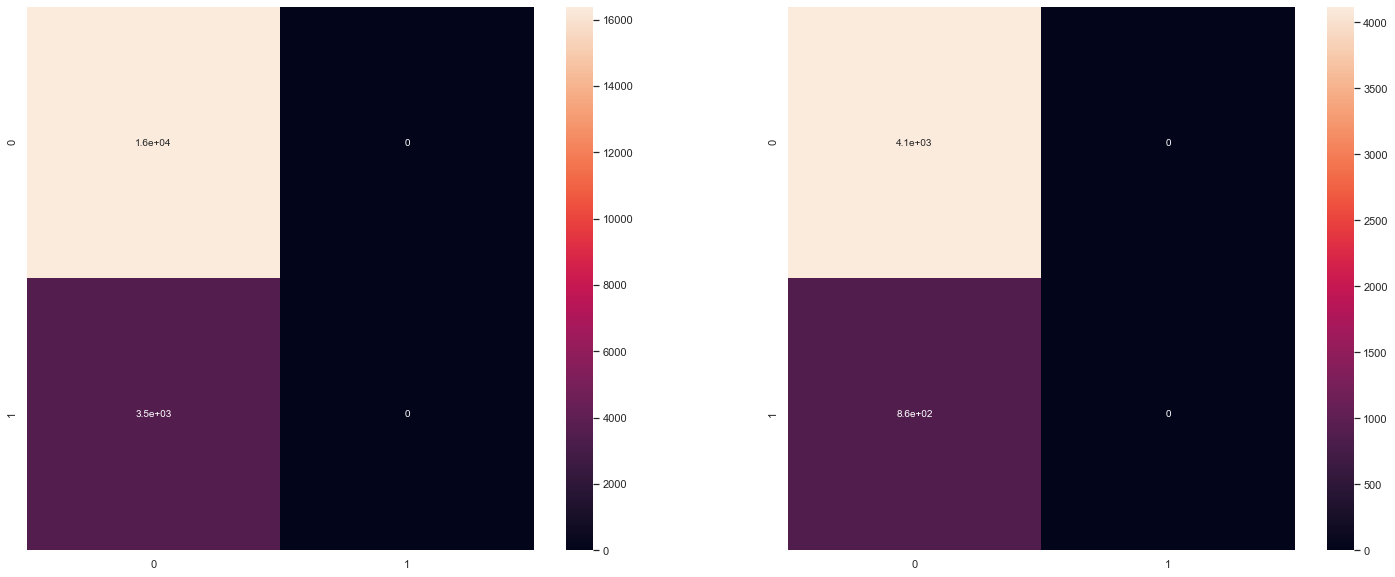

In [34]:
# Split the Dataset into Train and Test
purpose_train, purpose_test, fatal_train, fatal_test = train_test_split(purpose_dummy, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(purpose_train, fatal_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
fatal_train_pred = dectree.predict(purpose_train)
fatal_test_pred = dectree.predict(purpose_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(purpose_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(purpose_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = purpose_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Classification between Weather Condition and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8366363955646982

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8418623319285571



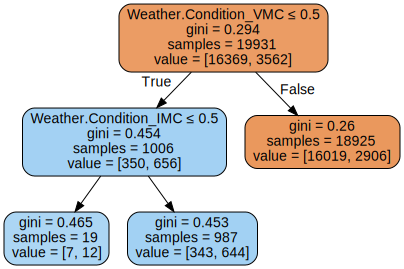

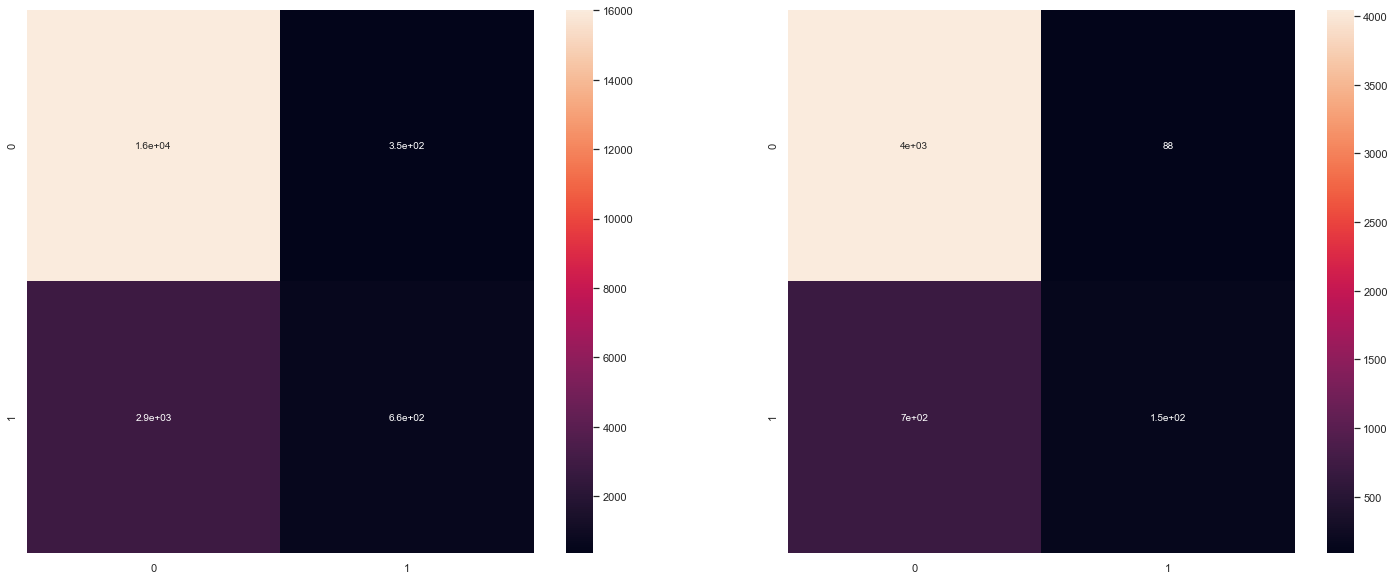

In [35]:
# Split the Dataset into Train and Test
weather_train, weather_test, fatal_train, fatal_test = train_test_split(weather_dummy, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(weather_train, fatal_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
fatal_train_pred = dectree.predict(weather_train)
fatal_test_pred = dectree.predict(weather_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(weather_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(weather_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = weather_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Classification between Broad Phase of Flight and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8227886207415583

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8238009231386715



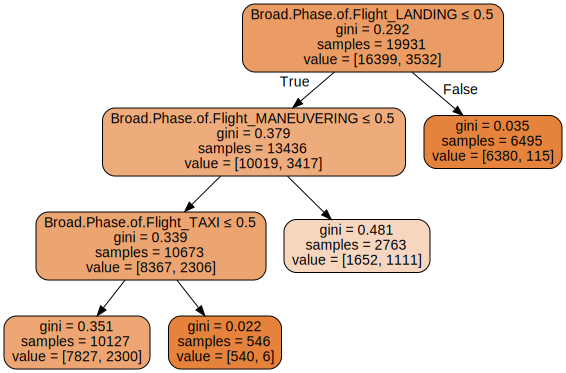

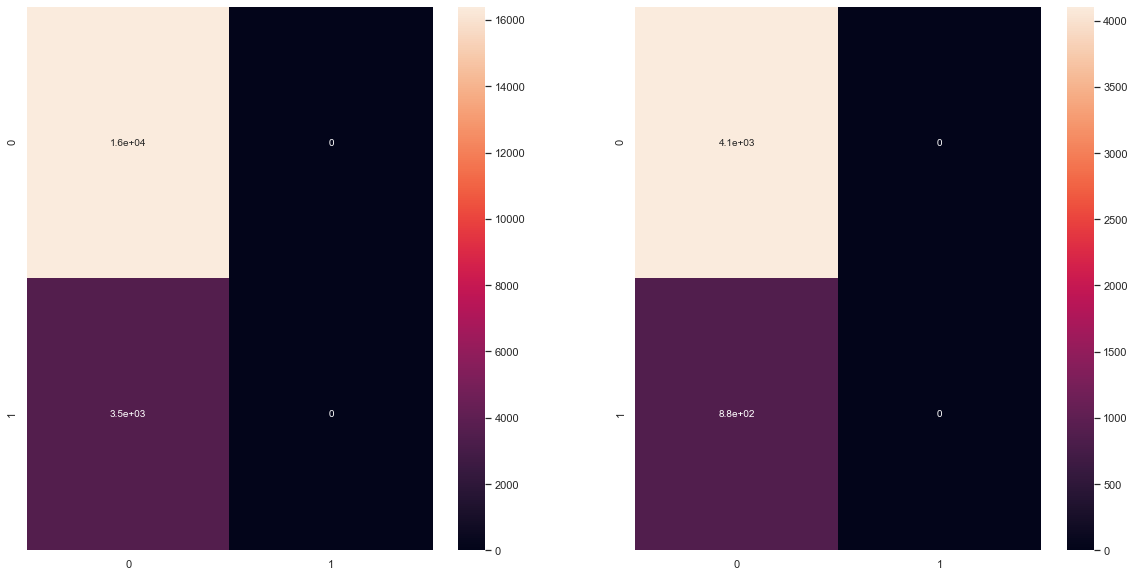

In [36]:
# Split the Predictor-Response Dataset into Train and Test
phase_train, phase_test, fatal_train, fatal_test = train_test_split(phase_dummy, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(phase_train, fatal_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
fatal_train_pred = dectree.predict(phase_train)
fatal_test_pred = dectree.predict(phase_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(phase_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(phase_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = phase_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Classification Between Latitude/Longitude and Fatality

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8220360242837791

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8268111579369858



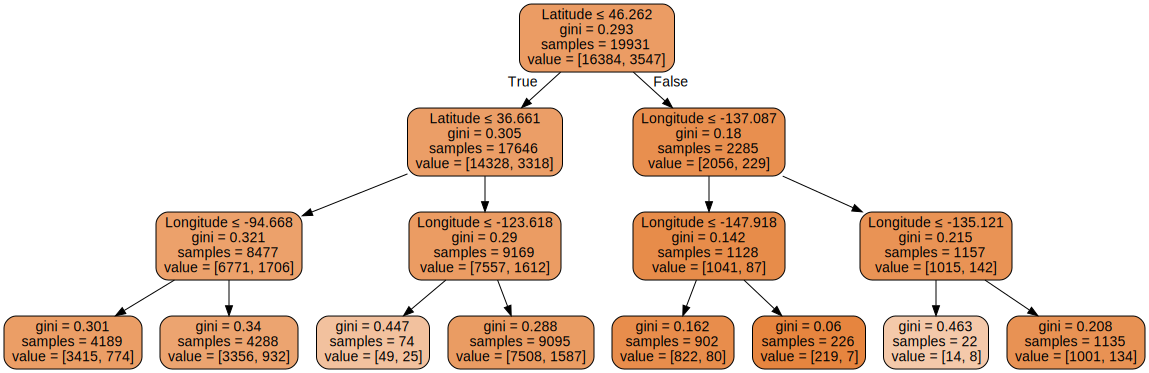

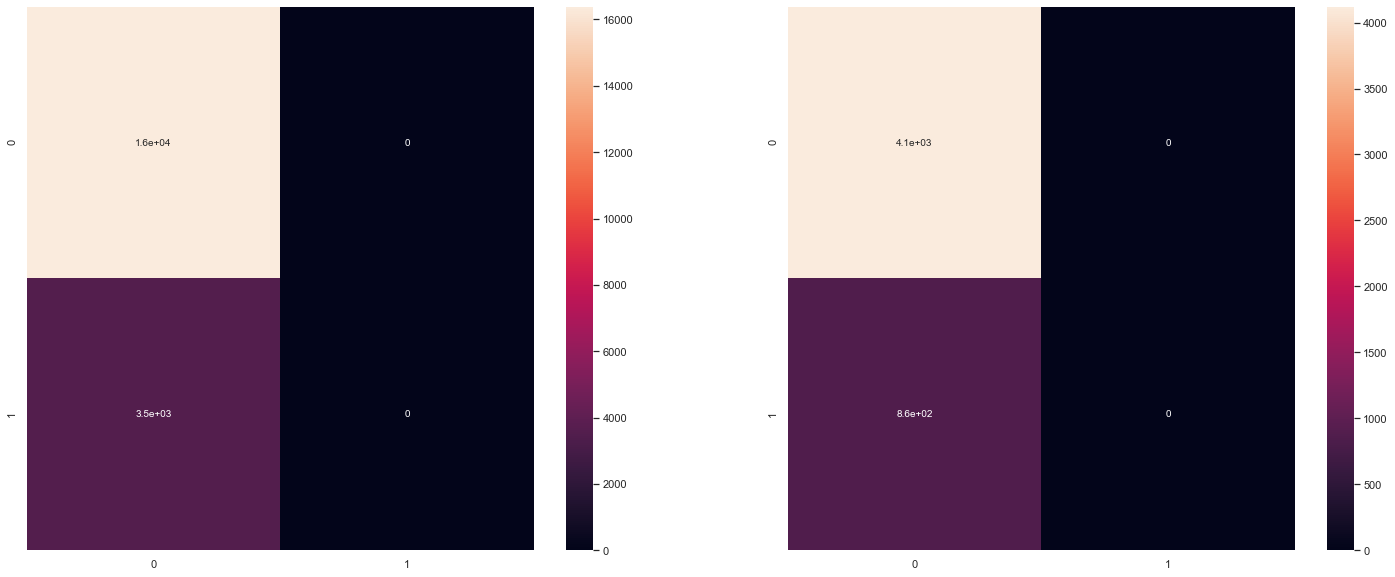

In [38]:
# Extract Predictor
location = pd.DataFrame(adata[["Longitude", "Latitude"]]) 

# Split the Dataset into Train and Test
location_train, location_test, fatal_train, fatal_test = train_test_split(location, fatal, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(location_train, fatal_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
fatal_train_pred = dectree.predict(location_train)
fatal_test_pred = dectree.predict(location_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(location_train, fatal_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(location_test, fatal_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sb.heatmap(confusion_matrix(fatal_train, fatal_train_pred),
           annot = True, ax = axes[0])
sb.heatmap(confusion_matrix(fatal_test, fatal_test_pred), 
           annot = True, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = location_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Machine Learning & Algorithmic Optimization

### Decision Tree & Random Forest Classification on all of previous variables against Fatality

In [39]:
X = adata[["Latitude","Longitude","Make","Number.of.Engines","Engine.Type","Purpose.of.Flight","Weather.Condition","Broad.Phase.of.Flight"]]
Y = adata["Fatality"]

In [40]:
X_dummy = pd.get_dummies(X)
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24914 entries, 0 to 24913
Data columns (total 58 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Latitude                                     24914 non-null  float64
 1   Longitude                                    24914 non-null  float64
 2   Number.of.Engines                            24914 non-null  int64  
 3   Make_AIR_TRACTION                            24914 non-null  uint8  
 4   Make_BEECH                                   24914 non-null  uint8  
 5   Make_BELL                                    24914 non-null  uint8  
 6   Make_BELLANCA                                24914 non-null  uint8  
 7   Make_CESSNA                                  24914 non-null  uint8  
 8   Make_MOONEY                                  24914 non-null  uint8  
 9   Make_OTHERS                                  24914 non-null  uint8  
 10

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size = 0.20)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predictions))
print('\n')
print(classification_report(Y_test, predictions))

[[3516  589]
 [ 527  351]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4105
           1       0.37      0.40      0.39       878

    accuracy                           0.78      4983
   macro avg       0.62      0.63      0.62      4983
weighted avg       0.78      0.78      0.78      4983



### Evaluating the importance of each variable in the Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, Y_train)
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    print(name, "=", importance)

Latitude = 0.3193918681604313
Longitude = 0.3214015696380781
Number.of.Engines = 0.01456107574217558
Make_AIR_TRACTION = 0.0011212250936275822
Make_BEECH = 0.0064225039908064685
Make_BELL = 0.0026984804461638178
Make_BELLANCA = 0.0018671232671634839
Make_CESSNA = 0.007480221849484897
Make_MOONEY = 0.002933462783738189
Make_OTHERS = 0.008561059646065673
Make_PIPER = 0.0068455716625181
Make_ROBINSON = 0.003705539691729467
Make_ROBINSON_HELICOPTER = 0.002240633697413755
Engine.Type_Electric = 0.00013277567088123735
Engine.Type_None = 0.00010131049938201586
Engine.Type_REC, ELEC = 2.3612837386705818e-05
Engine.Type_REC, TJ, TJ = 6.777569027333401e-05
Engine.Type_Reciprocating = 0.006908710499341861
Engine.Type_TJ, REC, REC, TJ = 0.00010638276003543717
Engine.Type_Turbo Fan = 0.0028900787661041106
Engine.Type_Turbo Jet = 0.001750163925619814
Engine.Type_Turbo Prop = 0.005054903852805723
Engine.Type_Turbo Shaft = 0.004507021885181542
Purpose.of.Flight_Aerial Application = 0.00734630145047144

#### Importance of Weather

In [43]:
weather = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Weather' in name:
        weather += importance
weather

0.07067111503392992

#### Importance of Purpose of Flight

In [44]:
Purpose = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Purpose' in name:
        Purpose += importance
Purpose

0.0600803160023284

#### Importance of Make

In [45]:
Make = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Make' in name:
        Make += importance
Make

0.04387582212871143

#### Importance of Broad Phase of Flight

In [46]:
Broad = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Broad' in name:
        Broad += importance
Broad

0.1484754969073334

#### Importance of Engine Type

In [47]:
Engine = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Engine' in name:
        Engine += importance
Engine

0.036103812129187354

#### The top 3 most import variables with their accumulative feature_importance coefficient:

#### 1.Broad phase of flight = 0.14475

#### 2.Weather = 0.07138

#### 3.Lat/Long = 0.639730081628594

### Using SMOTE to train the Decision Tree 

In [48]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 16399, 1: 3532}

In [49]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 12 , k_neighbors=1)
X_train_res, Y_train_res = smt.fit_sample(X_train, Y_train)

unique, count = np.unique(Y_train_res, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

dtree.fit(X_train_res, Y_train_res) #do the same thing with SMOTE on train data

smote_pred = dtree.predict(X_test)

print(confusion_matrix(Y_test, smote_pred))
print('\n')
print(classification_report(Y_test, smote_pred))

[[3514  591]
 [ 530  348]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4105
           1       0.37      0.40      0.38       878

    accuracy                           0.78      4983
   macro avg       0.62      0.63      0.62      4983
weighted avg       0.78      0.78      0.78      4983



In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test, rfc_pred))
print('\n')
print(classification_report(Y_test, rfc_pred))#unbalanced dataset

[[3806  299]
 [ 583  295]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4105
           1       0.50      0.34      0.40       878

    accuracy                           0.82      4983
   macro avg       0.68      0.63      0.65      4983
weighted avg       0.80      0.82      0.81      4983



### Using SMOTE on train data and using it to train the Random Forest

In [51]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 16399, 1: 3532}

In [52]:
smt = SMOTE(random_state = 12 , k_neighbors=5)
X_train_res, Y_train_res = smt.fit_sample(X_train, Y_train)

In [53]:
unique, count = np.unique(Y_train_res, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 16399, 1: 16399}

In [54]:
rfc.fit(X_train_res, Y_train_res) #train model with SMOTE train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rfc_smote_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(Y_test, rfc_smote_pred))
print('\n')
print(classification_report(Y_test, rfc_smote_pred))

[[3639  466]
 [ 516  362]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4105
           1       0.44      0.41      0.42       878

    accuracy                           0.80      4983
   macro avg       0.66      0.65      0.65      4983
weighted avg       0.80      0.80      0.80      4983



### Evaluating the importance of each variable in the Random Forest Classifier after SMOTE

In [57]:
rnd_clf.fit(X_train_res, Y_train_res)
for name, importance in zip(X_train_res, rnd_clf.feature_importances_):   
    print(name, "=", importance)

Latitude = 0.18806174776930742
Longitude = 0.1945632321239782
Number.of.Engines = 0.00802484367576279
Make_AIR_TRACTION = 0.0026967176891708584
Make_BEECH = 0.009765056371124264
Make_BELL = 0.005544007021122532
Make_BELLANCA = 0.0036914667989011735
Make_CESSNA = 0.02228968427563058
Make_MOONEY = 0.0049905144237250435
Make_OTHERS = 0.02009404219896562
Make_PIPER = 0.014889163569535124
Make_ROBINSON = 0.006366966634534967
Make_ROBINSON_HELICOPTER = 0.004980590316258402
Engine.Type_Electric = 4.942554366431007e-05
Engine.Type_None = 0.0001956920555028631
Engine.Type_REC, ELEC = 4.0355630140585954e-05
Engine.Type_REC, TJ, TJ = 5.794474408272828e-06
Engine.Type_Reciprocating = 0.008914242531818915
Engine.Type_TJ, REC, REC, TJ = 7.6214027362384594e-06
Engine.Type_Turbo Fan = 0.002090436855553173
Engine.Type_Turbo Jet = 0.0010528886069381968
Engine.Type_Turbo Prop = 0.004956723372683262
Engine.Type_Turbo Shaft = 0.008781926484633674
Purpose.of.Flight_Aerial Application = 0.019073294949162694


#### Importance of Weather

In [58]:
weather = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Weather' in name:
        weather += importance
weather

0.055591941308993906

#### Importance of Purpose of Flight

In [59]:
Purpose = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Purpose' in name:
        Purpose += importance
Purpose

0.09186713329278366

#### Importance of Make

In [60]:
Make = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Make' in name:
        Make += importance
Make

0.09530820929896858

#### Importance of Broad Phase of Flight

In [61]:
Broad = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Broad' in name:
        Broad += importance
Broad

0.3404877855721259

#### Importance of Engine Type

In [62]:
Engine = 0
for name, importance in zip(X_train, rnd_clf.feature_importances_):   
    if 'Engine' in name:
        Engine += importance
Engine

0.03411995063384228

#### The top 3 most important variables with their accumulative feature_importance coefficient after SMOTE

#### 1.Longitude/Latitude = 0.38017

#### 2.Broad Phase of Flight = 0.34268

#### 3.Make = 0.096758

#### After SMOTE, the importance of each variable in the Random Forest has changed. We have decided to use the top 3 most important variables in order to predict whether a plane crash will be fatal or not.

### Logistic Regression on the top 3 variables together

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Extracting the top 3 variables
Variables = adata[["Make", "Latitude", "Longitude", "Broad.Phase.of.Flight"]]

# Dummy Code the categorical variables
X = pd.get_dummies(data=Variables)
Y = adata["Fatality"]

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [65]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\jinha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions_log = logmodel.predict(X_test)

In [67]:
print(classification_report(Y_test, predictions_log))
print(confusion_matrix(Y_test, predictions_log))
print(pd.DataFrame(list(zip(X_train.columns, logmodel.coef_[0])), columns = ["Predictors", "Coefficients"]))

print("Explained Variance (R^2) train\t:", logmodel.score(X_train, Y_train))
print("Explained Variance (R^2) test\t:", logmodel.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4127
           1       0.63      0.03      0.05       856

    accuracy                           0.83      4983
   macro avg       0.73      0.51      0.48      4983
weighted avg       0.80      0.83      0.76      4983

[[4113   14]
 [ 832   24]]
                           Predictors  Coefficients
0                            Latitude     -0.013326
1                           Longitude      0.002229
2                   Make_AIR_TRACTION     -0.752305
3                          Make_BEECH      0.773192
4                           Make_BELL     -0.871960
5                       Make_BELLANCA      0.049729
6                         Make_CESSNA      0.069281
7                         Make_MOONEY      0.571969
8                         Make_OTHERS      0.208481
9                          Make_PIPER      0.366090
10                      Make_ROBINSON     -0.664803
11           Make_ROBI

### Logistic Regression on the top 3 variables together after SMOTE

In [68]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

smt = SMOTE(random_state = 12 , k_neighbors=5)
X_train_res, Y_train_res = smt.fit_sample(X_train, Y_train)

unique, count = np.unique(Y_train_res, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 16377, 1: 16377}

In [69]:
logmodel.fit(X_train_res, Y_train_res)

C:\Users\jinha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions_log = logmodel.predict(X_test)

In [71]:
print(classification_report(Y_test, predictions_log)) #with smote
print(confusion_matrix(Y_test, predictions_log))
print(pd.DataFrame(list(zip(X_train.columns, logmodel.coef_[0])), columns = ["Predictors", "Coefficients"]))

print("Explained Variance (R^2) train\t:", logmodel.score(X_train, Y_train))
print("Explained Variance (R^2) test\t:", logmodel.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      4127
           1       0.38      0.52      0.44       856

    accuracy                           0.77      4983
   macro avg       0.63      0.67      0.65      4983
weighted avg       0.80      0.77      0.78      4983

[[3387  740]
 [ 410  446]]
                           Predictors  Coefficients
0                            Latitude     -0.031011
1                           Longitude      0.003330
2                   Make_AIR_TRACTION     -4.245642
3                          Make_BEECH     -2.549062
4                           Make_BELL     -5.333548
5                       Make_BELLANCA     -2.305212
6                         Make_CESSNA     -3.131779
7                         Make_MOONEY     -2.677501
8                         Make_OTHERS     -2.743211
9                          Make_PIPER     -2.883752
10                      Make_ROBINSON     -4.536606
11           Make_ROBI

#### It appears that SMOTE training data has made the mode worse, with a lower R^2 for both train and test data, and a lower weighted average classification accuracy.

#### However, SMOTE has made the model much better at predicting fatalities, with "True" recall improving greatly, making the model a much better balanced one

______________________________________________________________________________________________________________________

### Using the Logistic Regression model to predict probability of fatality given a list containing:

#### 1.Longitude and Latitude

#### 2.Phase of flight

#### 3.Make

In [72]:
testing_data = [[50,-100,"LANDING","CESSNA"],[80,-120,"CLIMB","BEECH"]]

In [73]:
column_name = list(X_train_res) #amending list such that it fits into the columns of the dataframe used in the model
print(column_name)
for i in testing_data:
    for variable in column_name:
        if i[2] in variable or i[3] in variable:
            i.append(1)
        else:
            i.append(0)
    del i[2:6]
testing_data

['Latitude', 'Longitude', 'Make_AIR_TRACTION', 'Make_BEECH', 'Make_BELL', 'Make_BELLANCA', 'Make_CESSNA', 'Make_MOONEY', 'Make_OTHERS', 'Make_PIPER', 'Make_ROBINSON', 'Make_ROBINSON_HELICOPTER', 'Broad.Phase.of.Flight_APPROACH', 'Broad.Phase.of.Flight_CLIMB', 'Broad.Phase.of.Flight_CRUISE', 'Broad.Phase.of.Flight_DESCENT', 'Broad.Phase.of.Flight_GO-AROUND', 'Broad.Phase.of.Flight_LANDING', 'Broad.Phase.of.Flight_MANEUVERING', 'Broad.Phase.of.Flight_OTHER', 'Broad.Phase.of.Flight_STANDING', 'Broad.Phase.of.Flight_TAKEOFF', 'Broad.Phase.of.Flight_TAXI']


[[50, -100, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [80, -120, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [74]:
testing_df = pd.DataFrame(testing_data, columns=column_name)
testing_df = pd.get_dummies(testing_df)

In [75]:
testing_df

,Latitude,Longitude,Make_AIR_TRACTION,Make_BEECH,Make_BELL,Make_BELLANCA,Make_CESSNA,Make_MOONEY,Make_OTHERS,Make_PIPER,...,Broad.Phase.of.Flight_CLIMB,Broad.Phase.of.Flight_CRUISE,Broad.Phase.of.Flight_DESCENT,Broad.Phase.of.Flight_GO-AROUND,Broad.Phase.of.Flight_LANDING,Broad.Phase.of.Flight_MANEUVERING,Broad.Phase.of.Flight_OTHER,Broad.Phase.of.Flight_STANDING,Broad.Phase.of.Flight_TAKEOFF,Broad.Phase.of.Flight_TAXI
0,50,-100,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,80,-120,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [76]:
Predictions = logmodel.predict_proba(testing_df)
for prob in Predictions:
    print("Fatality Probability:\t" ,prob[1])

Fatality Probability:	 0.017555078614696507
Fatality Probability:	 0.2273025958584837


#### These are the probabilities that the plane crash will result in fatality, given the values in testing_data